In [1]:
!pip uninstall numpy gensim -y
!pip install numpy gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import spacy
import re
import string
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import sparse
import keras

In [ ]:
train_df = pd.read_csv(r"/content/combined_toxic_comments.csv")

<ipython-input-2-4a5e5dc20330>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"/content/combined_toxic_comments.csv")


In [ ]:
train_df.head(25)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,source
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,original
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,original
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,original
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,original
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,original
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0.0,0.0,0.0,0.0,0.0,0.0,original
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,1.0,0.0,1.0,0.0,original
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0.0,0.0,0.0,0.0,0.0,0.0,original
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0.0,0.0,0.0,0.0,0.0,0.0,original
9,00040093b2687caa,alignment on this subject and which are contra...,0.0,0.0,0.0,0.0,0.0,0.0,original


In [ ]:
filter_ = ~train_df['source'].isin(['cleaned'])
filter_cleaned = train_df['source'].isin(['cleaned'])
df_filtered = train_df[filter_]
df_cleaned = train_df[filter_cleaned]
print(df_filtered)

                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insul

In [ ]:
df_filtered.to_csv('original_comments.csv', index=False)

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Load spaCy model (make sure to run: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])

def vectorized_clean(series):
    """
    Use vectorized operations to lowercase and remove punctuation.
    """
    pattern = f"[{re.escape(string.punctuation)}]"
    return series.str.lower().str.replace(pattern, '', regex=True)

def spacy_tokenize(texts, batch_size=500):
    """
    Use spaCy's nlp.pipe to tokenize text in batches.
    """
    clean_texts = []
    for doc in tqdm(nlp.pipe(texts, batch_size=batch_size, n_process=1), total=len(texts)):
        tokens = [token.text for token in doc if not token.is_space]
        clean_texts.append(" ".join(tokens))
    return clean_texts

In [ ]:
chunk_size = 10**6  # Adjust based on your memory capacity
processed_chunks = []

for chunk in pd.read_csv('/content/original_comments.csv', chunksize=chunk_size):
    # Remove duplicates and fill missing values
    chunk.drop_duplicates(inplace=True)
    chunk.fillna('', inplace=True)

    if 'comment_text' in chunk.columns:
        # Vectorized cleaning: lowercase & remove punctuation
        chunk['comment_text'] = vectorized_clean(chunk['comment_text'])

        # Option 1: If tokenization isn't strictly needed here, comment out the next block.
        # Option 2: If tokenization is needed, use spaCy's nlp.pipe for improved performance.
        texts = chunk['comment_text'].tolist()
        chunk['comment_text'] = spacy_tokenize(texts, batch_size=500)

    processed_chunks.append(chunk)

# Concatenate all processed chunks and save the cleaned data
cleaned_original_df = pd.concat(processed_chunks)

100%|██████████| 159571/159571 [10:02<00:00, 265.04it/s]


In [ ]:
# Combine the two DataFrames
combined_df = pd.concat([cleaned_original_df, df_cleaned], ignore_index=True)

In [ ]:
combined_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,source
0,0000997932d777bf,explanation why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0,original
1,000103f0d9cfb60f,daww he matches this background colour i m see...,0.0,0.0,0.0,0.0,0.0,0.0,original
2,000113f07ec002fd,hey man i m really not trying to edit war its ...,0.0,0.0,0.0,0.0,0.0,0.0,original
3,0001b41b1c6bb37e,more i ca nt make any real suggestions on impr...,0.0,0.0,0.0,0.0,0.0,0.0,original
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0,0.0,0.0,0.0,0.0,0.0,original


In [ ]:
# Check for missing values, data types, and unique values
print(combined_df.isnull().sum())
print(combined_df.dtypes)
print(combined_df.nunique())

id                 0
comment_text     223
toxic              0
severe_toxic       0
obscene            0
threat             0
insult             0
identity_hate      0
source             0
dtype: int64
id                object
comment_text      object
toxic            float64
severe_toxic     float64
obscene          float64
threat           float64
insult           float64
identity_hate    float64
source            object
dtype: object
id               1964445
comment_text     1927936
toxic               2913
severe_toxic        1460
obscene             2417
threat              2053
insult              3042
identity_hate       2294
source                 2
dtype: int64


In [ ]:
# Fill missing values
combined_df["comment_text"] = combined_df["comment_text"].fillna("")

# Word count, character count, average word length
combined_df["word_count"] = combined_df["comment_text"].apply(lambda x: len(str(x).split()))
combined_df["char_count"] = combined_df["comment_text"].apply(lambda x: len(str(x)))
combined_df["avg_word_length"] = combined_df["char_count"] / combined_df["word_count"].replace(0, 1)

# Count punctuation marks
combined_df["punctuation_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for char in str(x) if char in string.punctuation)
)

# Count uppercase words
combined_df["uppercase_word_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for word in str(x).split() if word.isupper())
)

# Count titlecase words
combined_df["titlecase_word_count"] = combined_df["comment_text"].apply(
    lambda x: sum(1 for word in str(x).split() if word.istitle())
)

# Calculate % of unique words
combined_df["unique_word_count"] = combined_df["comment_text"].apply(lambda x: len(set(str(x).split())))
combined_df["word_unique_percent"] = combined_df["unique_word_count"] * 100 / combined_df["word_count"].replace(0, 1)

# Calculate % of punctuation characters
combined_df["punct_percent"] = combined_df["punctuation_count"] * 100 / combined_df["word_count"].replace(0, 1)

In [ ]:
print(combined_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  explanation why the edits made under my userna...    0.0   
1  000103f0d9cfb60f  daww he matches this background colour i m see...    0.0   
2  000113f07ec002fd  hey man i m really not trying to edit war its ...    0.0   
3  0001b41b1c6bb37e  more i ca nt make any real suggestions on impr...    0.0   
4  0001d958c54c6e35  you sir are my hero any chance you remember wh...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate    source  word_count  \
0           0.0      0.0     0.0     0.0            0.0  original          46   
1           0.0      0.0     0.0     0.0            0.0  original          18   
2           0.0      0.0     0.0     0.0            0.0  original          43   
3           0.0      0.0     0.0     0.0            0.0  original         110   
4           0.0      0.0     0.0     0.0            0.0  original          14   

   char_count  avg_word_le

<ipython-input-13-a75ba738a141>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")


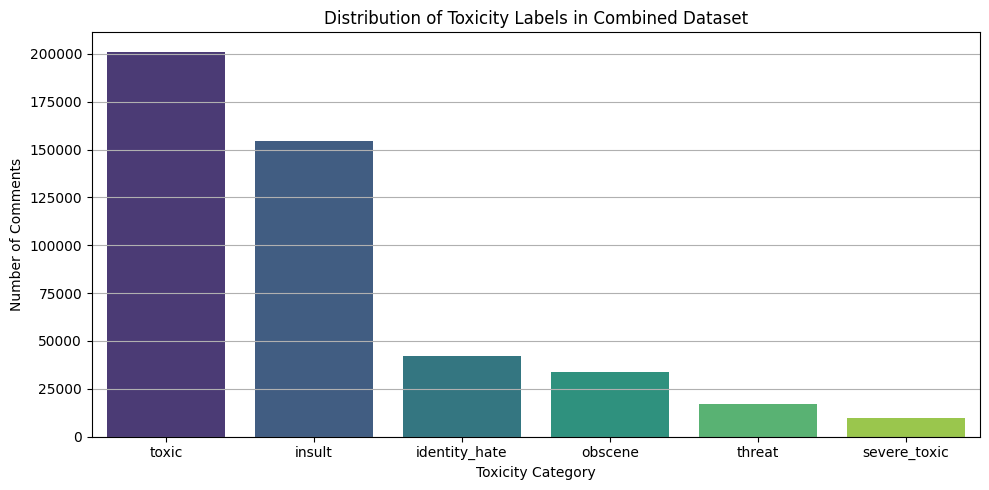

In [ ]:
# Calculate label sums
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_sums = combined_df[label_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=label_sums.index, y=label_sums.values, palette="viridis")
plt.title("Distribution of Toxicity Labels in Combined Dataset")
plt.ylabel("Number of Comments")
plt.xlabel("Toxicity Category")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Insights:

*   "Toxic", "Insult" and "identity_hate" appear most frequently — common in both datasets.

*   "obscene", "Threat", and "Severe Toxic" are rarer — showing class imbalance.



<ipython-input-14-3abbfecad325>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_labels', data=binary_combined_labels_df, palette="magma")


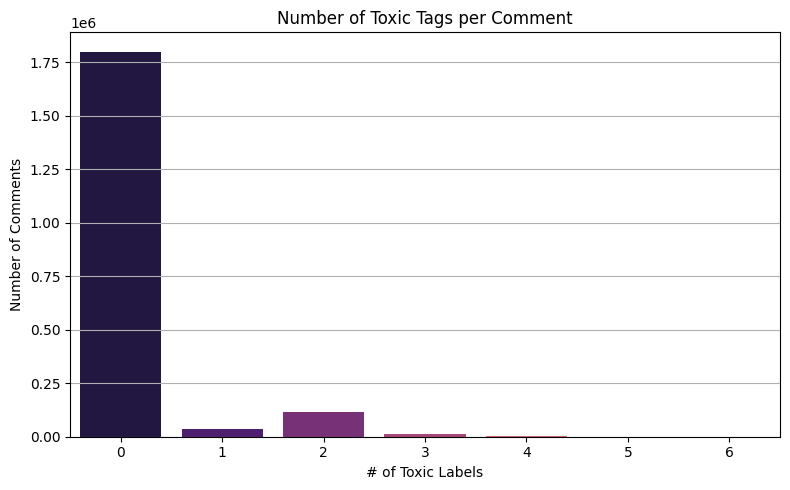

In [ ]:
binary_combined_labels_df = pd.DataFrame()

# Convert float labels to binary (threshold = 0.5)
binary_combined_labels_df[label_cols] = (combined_df[label_cols] >= 0.5).astype(int)

# Count number of labels per row
binary_combined_labels_df['num_labels'] = binary_combined_labels_df[label_cols].sum(axis=1)

# Plot distribution of number of toxic tags per comment
plt.figure(figsize=(8, 5))
sns.countplot(x='num_labels', data=binary_combined_labels_df, palette="magma")
plt.title("Number of Toxic Tags per Comment")
plt.xlabel("# of Toxic Labels")
plt.ylabel("Number of Comments")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tags	Interpretation
*   0 :	Majority (~90%) of comments are clean (not labeled with any toxic tag).
*   1-2 :	A decent number have 1–2 toxic traits — e.g., just "toxic", or "toxic + insult".
*   3+ :	Fewer comments have multiple layers of toxicity (e.g., "toxic + obscene + threat").

**What This Means for Your Modeling:**

*   Imbalanced dataset: Heavy skew towards non-toxic (0-label) comments.
*   Multi-label learning is required, not just binary classification.

**Performance metrics should include:**

*   Macro F1 (accounts for minority classes)
*   Subgroup analysis (e.g., 2+ labels vs 0–1)

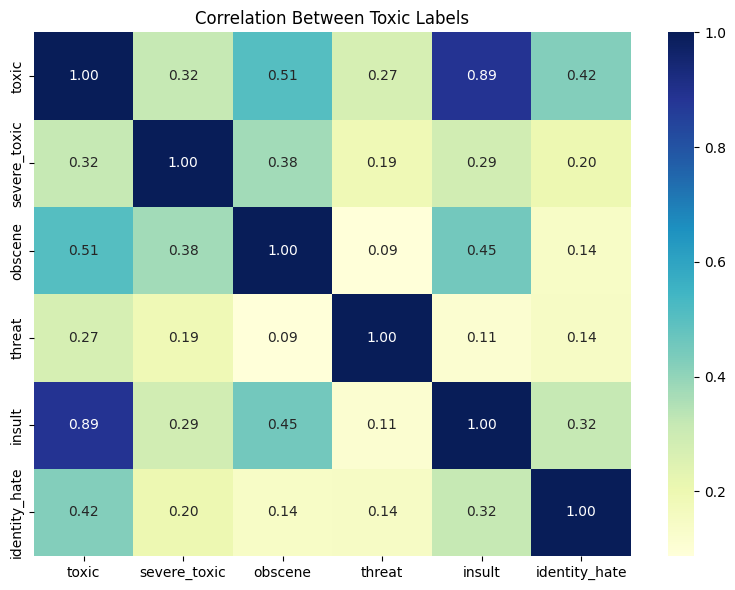

In [ ]:
# Calculate Pearson correlation between label columns
correlation = combined_df[label_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Toxic Labels")
plt.tight_layout()
plt.show()

### Strong Correlations

*   Toxic ↔ Insult: 0.89
Indicates that most "insult" comments are also labeled "toxic". A model learning to predict "toxic" might already capture a lot of "insult" signal.
*   Toxic ↔ Obscene: 0.51
Often used together — offensive language usually overlaps with toxicity.
*   Toxic ↔ Severe Toxic: 0.32
Every "severe toxic" comment is by definition "toxic", which this reflects.

In [ ]:
print(binary_combined_labels_df.head())

   toxic  severe_toxic  obscene  threat  insult  identity_hate  num_labels
0      0             0        0       0       0              0           0
1      0             0        0       0       0              0           0
2      0             0        0       0       0              0           0
3      0             0        0       0       0              0           0
4      0             0        0       0       0              0           0


In [ ]:
# Add the label column based on binary_combined_labels_df
combined_df["label"] = (binary_combined_labels_df["num_labels"] > 0).astype(int)

In [ ]:
print(combined_df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  explanation why the edits made under my userna...    0.0   
1  000103f0d9cfb60f  daww he matches this background colour i m see...    0.0   
2  000113f07ec002fd  hey man i m really not trying to edit war its ...    0.0   
3  0001b41b1c6bb37e  more i ca nt make any real suggestions on impr...    0.0   
4  0001d958c54c6e35  you sir are my hero any chance you remember wh...    0.0   

   severe_toxic  obscene  threat  insult  identity_hate    source  word_count  \
0           0.0      0.0     0.0     0.0            0.0  original          46   
1           0.0      0.0     0.0     0.0            0.0  original          18   
2           0.0      0.0     0.0     0.0            0.0  original          43   
3           0.0      0.0     0.0     0.0            0.0  original         110   
4           0.0      0.0     0.0     0.0            0.0  original          14   

   char_count  avg_word_le

In [ ]:
combined_df.to_csv("merged_dataset.csv", index=False)

In [5]:
combined_df = pd.read_csv("merged_dataset.csv")

<ipython-input-5-dd732b4a6332>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("merged_dataset.csv")


In [6]:
# Load GloVe vectors
glove = api.load("glove-wiki-gigaword-300")


[==================================================] 100.0% 376.1/376.1MB downloaded


In [7]:
def avg_glove(text):
    words = [w for w in str(text).split() if w in glove]
    return np.mean([glove[w] for w in words], axis=0) if words else np.zeros(300)

# Apply it to ALL rows in combined_df
X_glove = np.vstack(combined_df["comment_text"].apply(avg_glove))

In [8]:
# Define engineered feature columns
engineered_cols = [
    'word_count',
    'char_count',
    'avg_word_length',
    'punctuation_count',
    'uppercase_word_count',
    'titlecase_word_count',
    'word_unique_percent',
    'punct_percent'
]

In [9]:
# Extract engineered features
X_features = combined_df[engineered_cols].values

# Scale both sets of features
glove_scaler = StandardScaler()
feature_scaler = MinMaxScaler()

X_glove_scaled = glove_scaler.fit_transform(X_glove)
X_feat_scaled = feature_scaler.fit_transform(X_features)

# Combine GloVe + Engineered Features
X_combined = np.hstack((X_glove_scaled, X_feat_scaled))

# Binary label
y = combined_df["label"].values

In [10]:
print("GloVe shape:", X_glove.shape)
print("Engineered features shape:", X_features.shape)
print("combined_df shape:", combined_df.shape)

GloVe shape: (1964445, 300)
Engineered features shape: (1964445, 8)
combined_df shape: (1964445, 19)


In [ ]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X_combined, y, test_size=0.2, stratify=y, random_state=42
)

# Deep Neural Networks

## Binary Classification

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

def train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=False):
    print(f"\n{'='*30}\nTraining with class_weight = {use_class_weight}\n{'='*30}")

    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Handle class imbalance
    class_weight = None
    if use_class_weight:
        weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
        class_weight = dict(enumerate(weights))

    # Train
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=0, class_weight=class_weight)

    # Predict probabilities
    y_val_probs = model.predict(X_val).ravel()

    # Find best threshold for F1
    precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_thresh = thresholds[best_idx]

    # Final predictions
    y_pred = (y_val_probs >= best_thresh).astype(int)

    # Evaluation
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    print(f"\n Best Threshold: {best_thresh:.4f}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    return {
        "model": model,
        "acc": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "threshold": best_thresh,
        "conf_matrix": cm
    }

In [ ]:
# Assuming X_train, y_train, X_val, y_val are already defined

result_no_weight = train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=False)
result_with_weight = train_and_evaluate(X_train, y_train, X_val, y_val, use_class_weight=True)


Training with class_weight = False
12278/12278 ━━━━━━━━━━━━━━━━━━━━ 12s 958us/step

 Best Threshold: 0.2399
Accuracy   : 0.9190
Precision  : 0.5143
Recall     : 0.5530
F1 Score   : 0.5330
Confusion Matrix:
[[342903  17148]
 [ 14679  18159]]

Training with class_weight = True
12278/12278 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step

 Best Threshold: 0.7122
Accuracy   : 0.9199
Precision  : 0.5205
Recall     : 0.5370
F1 Score   : 0.5286
Confusion Matrix:
[[343802  16249]
 [ 15203  17635]]


## Multi-label Classification

In [11]:
# Labels for multi-label task
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_multi = combined_df[label_cols].values

In [12]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_multi, test_size=0.2, random_state=42)

In [13]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_combined.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(label_cols), activation='sigmoid')  # One output per label
])

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)

Epoch 1/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 73s 3ms/step - accuracy: 0.9010 - loss: 0.1277 - val_accuracy: 0.9587 - val_loss: 0.1153
Epoch 2/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.9348 - loss: 0.1177 - val_accuracy: 0.9632 - val_loss: 0.1147
Epoch 3/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9300 - loss: 0.1169 - val_accuracy: 0.9664 - val_loss: 0.1146
Epoch 4/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9267 - loss: 0.1164 - val_accuracy: 0.9566 - val_loss: 0.1144
Epoch 5/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.9290 - loss: 0.1162 - val_accuracy: 0.9548 - val_loss: 0.1146
Epoch 6/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.9280 - loss: 0.1162 - val_accuracy: 0.9662 - val_loss: 0.1140
Epoch 7/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 70s 3ms/step - accuracy: 0.9284 - loss: 0.1161 - val_accuracy: 0.9634 - val_loss: 0.1144
Epoch 8/10
24556/24556 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 

In [18]:
from sklearn.metrics import classification_report, hamming_loss

# Ensure y_val is int
y_val_binary = y_val.astype(int)

# Predict (use threshold of 0.5)
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluation per label
print("Classification Report (per label):")
print(classification_report(
    y_val_binary, y_pred,
    target_names=label_cols,
    digits=4,
    zero_division=0
))

# Hamming loss (multi-label error rate)
print("Hamming Loss:", hamming_loss(y_val_binary, y_pred))

12278/12278 ━━━━━━━━━━━━━━━━━━━━ 12s 988us/step
Classification Report (per label):
               precision    recall  f1-score   support

        toxic     0.2001    0.3821    0.2626      3913
 severe_toxic     0.4545    0.0152    0.0293       330
      obscene     0.8278    0.4436    0.5776      1745
       threat     0.0867    0.1140    0.0985       114
       insult     0.1591    0.3843    0.2250      2316
identity_hate     0.3488    0.0898    0.1429       334

    micro avg     0.2251    0.3664    0.2789      8752
    macro avg     0.3462    0.2382    0.2227      8752
 weighted avg     0.3282    0.3664    0.3000      8752
  samples avg     0.0035    0.0030    0.0031      8752

Hamming Loss: 0.007035914299797992


In [20]:
from sklearn.metrics import accuracy_score

exact_match = accuracy_score(y_val_binary, y_pred)
print(f"Exact Match Accuracy: {exact_match:.4f}")

Exact Match Accuracy: 0.9754


In [21]:
sample_accuracy = (y_val_binary == y_pred).mean(axis=1).mean()
print(f"Sample-wise Mean Accuracy: {sample_accuracy:.4f}")

Sample-wise Mean Accuracy: 0.9930


In [22]:
for idx, label in enumerate(label_cols):
    label_acc = accuracy_score(y_val_binary[:, idx], y_pred[:, idx])
    print(f"Accuracy for {label:<15}: {label_acc:.4f}")

Accuracy for toxic          : 0.9786
Accuracy for severe_toxic   : 0.9992
Accuracy for obscene        : 0.9971
Accuracy for threat         : 0.9994
Accuracy for insult         : 0.9844
Accuracy for identity_hate  : 0.9991
